In [3]:
import requests
import json
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

# B. Khám phá dữ liệu


## 1. Đọc dữ liệu, tính số dòng và số cột

Đọc dữ liệu từ file `flight_data_2024-10-31.csv` và in ra 5 dòng đầu tiên

In [4]:
df = pd.read_csv('data//merge.csv')
df.head()

,scrape_date,id_departure,id_arrival,departure_datetime,arrival_datetime,airline,travel_class,is_nonstop,price
0,2024-11-15,SGN,CXR,2024-12-01 02:10:00,2024-12-01 16:35:00,"China Eastern, Shanghai Airlines, China Southern",Business,"2 stops in PVG, CAN",79240000.0
1,2024-11-15,SGN,CXR,2024-12-01 02:25:00,2024-12-01 09:40:00,China Southern,Business,1 stop in CAN,18789000.0
2,2024-11-15,SGN,CXR,2024-12-01 06:50:00,2024-12-01 08:00:00,Vietnam Airlines,Business,Nonstop,3268000.0
3,2024-11-15,SGN,CXR,2024-12-01 06:50:00,2024-12-01 08:00:00,Vietnam Airlines,Economy,Nonstop,892000.0
4,2024-11-15,SGN,CXR,2024-12-01 07:45:00,2024-12-01 08:55:00,Vietjet,Economy,Nonstop,896600.0


In [5]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 299790
Number of columns: 9


## 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong tập dữ liệu là thông tin và các chỉ số về giá vé máy bay từ HÀ NỘI ĐẾN SÀI GÒN và từ SÀI GÒN ĐẾN HÀ NỘI tại thời điểm nhất định . Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau, tức không có dòng nào bị 'lạc loài'

## 3. Dữ liệu có các dòng bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương thức duplicated() và any() và lưu kết quả vào biến have_duplicated_rows. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu không có dòng bị lặp

In [6]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [7]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [scrape_date, id_departure, id_arrival, departure_datetime, arrival_datetime, airline, travel_class, is_nonstop, price]
Index: []


### Cần xoá đi những dòng bị lặp và không cần thiết

In [8]:
df = df.drop_duplicates()

In [9]:
have_duplicate_rows = df.duplicated().any()
print(have_duplicate_rows)  # Nếu trả về False, nghĩa là đã xóa hết các dòng trùng lặp

False


## 4. Tỉ lệ giá trị thiếu của từng cột

Ta tính tỉ lệ giá trị thiếu của từng cột. Đầu tiên ta dùng isnull() để biết được các giá trị thiếu, sau đó dùng sum() để tính tổng số giá trị thiếu theo từng cột. Cuối cùng ta chia cho tổng số dòng để tính tỉ lệ giá trị thiếu của mỗi cột và lưu kết quả vào biến missing_ratio

In [10]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

scrape_date           0.0
id_departure          0.0
id_arrival            0.0
departure_datetime    0.0
arrival_datetime      0.0
airline               0.0
travel_class          0.0
is_nonstop            0.0
price                 0.0
dtype: float64

In [11]:
del_cols = []
for i in range(len(missing_ratio)):
    if missing_ratio[i] > 0.9:
        del_cols.append(missing_ratio.index[i])
df = df.drop(del_cols,axis=1)
df.columns

Index(['scrape_date', 'id_departure', 'id_arrival', 'departure_datetime',
       'arrival_datetime', 'airline', 'travel_class', 'is_nonstop', 'price'],
      dtype='object')

<Axes: >

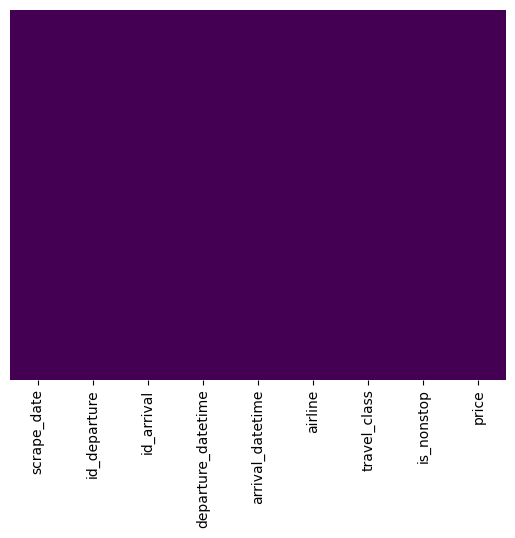

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 5. Mỗi cột có ý nghĩa gì?

- id_departure: Mã sân bay khởi hành (ví dụ: HAN cho sân bay Nội Bài, SGN cho sân bay Tân Sơn Nhất).

- id_arrival: Mã sân bay đến (ví dụ: SGN cho sân bay Tân Sơn Nhất, HAN cho sân bay Nội Bài).

- departure_date: Ngày khởi hành (định dạng: YYYY-MM-DD).

- departure_time: Thời gian khởi hành (định dạng: HH).

- arrival_time: Thời gian đến (định dạng: HH).

- airline: Tên hãng hàng không (ví dụ: Vietjet, Bamboo Airways, Vietnam Airlines).

- travel_class: Hạng vé (ví dụ: Economy, Business).

- is_nonstop: Thông tin về chuyến bay (Nonstop có nghĩa là chuyến bay không có điểm dừng).

- price: Giá vé (đơn vị: VND). 

- Scraping Date: Ngày thu thập dữ liệu (định dạng: YYYY-MM-DD), tức là ngày mà thông tin chuyến bay được lấy từ trang web.

Thống kê mô tả của từng cột

In [13]:
df.describe()

,price
count,2.997900e+05
mean,5.239275e+06
std,9.244196e+06
min,6.136400e+05
25%,1.674200e+06
50%,2.523000e+06
75%,5.860000e+06
max,1.259760e+08


## 6. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

Dùng info() để xem thuộc tính của từng cột

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299790 entries, 0 to 299789
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   scrape_date         299790 non-null  object 
 1   id_departure        299790 non-null  object 
 2   id_arrival          299790 non-null  object 
 3   departure_datetime  299790 non-null  object 
 4   arrival_datetime    299790 non-null  object 
 5   airline             299790 non-null  object 
 6   travel_class        299790 non-null  object 
 7   is_nonstop          299790 non-null  object 
 8   price               299790 non-null  float64
dtypes: float64(1), object(8)
memory usage: 22.9+ MB


In [15]:
pd.set_option('display.max_columns', None)
df.head()

,scrape_date,id_departure,id_arrival,departure_datetime,arrival_datetime,airline,travel_class,is_nonstop,price
0,2024-11-15,SGN,CXR,2024-12-01 02:10:00,2024-12-01 16:35:00,"China Eastern, Shanghai Airlines, China Southern",Business,"2 stops in PVG, CAN",79240000.0
1,2024-11-15,SGN,CXR,2024-12-01 02:25:00,2024-12-01 09:40:00,China Southern,Business,1 stop in CAN,18789000.0
2,2024-11-15,SGN,CXR,2024-12-01 06:50:00,2024-12-01 08:00:00,Vietnam Airlines,Business,Nonstop,3268000.0
3,2024-11-15,SGN,CXR,2024-12-01 06:50:00,2024-12-01 08:00:00,Vietnam Airlines,Economy,Nonstop,892000.0
4,2024-11-15,SGN,CXR,2024-12-01 07:45:00,2024-12-01 08:55:00,Vietjet,Economy,Nonstop,896600.0


Dựa trên quan sát, có một số cột cần điều chỉnh kiểu dữ liệu để dễ dàng xử lý và phân tích:
1. **scrape_date**, **departure_datetime**, **arrival_datetime**: Đây là các cột lưu chứa thông tin về ngày giờ. Để dễ dàng thao tác với dữ liệu thời gian, nên chuyển các cột này từ *object* sang *datetime*. Ngoài ra, nên tách thuộc tính **departure_datetime** thành hai cột **departure_date** và **departure_time** để thuận lợi hơn trong quá trình phân tích dữ liệu. Tương tự với cột **arrival_datetime**
2. **price**: Đây là cột dữ liệu chứa giá vé máy bay, nên chuyển thành kiểu dữ liệu số và bỏ dấu phân cách hàng nghìn trước khi chuyển đổi.
3. **is_nonstop**, **travel_class**, **airline**: Đây là những cột chứa dữ liệu phân loại nên chuyển sang kiểu dữ liệu **category** để giảm bộ nhớ và tối ưu hiệu suất phân tích

In [16]:
# Chuyển đổi các cột departure_datetime và arrival_datetime sang định dạng datetime
df['departure_datetime'] = pd.to_datetime(df['departure_datetime'])
df['arrival_datetime'] = pd.to_datetime(df['arrival_datetime'])

# Tách departure_datetime thành departure_date và departure_time
df['departure_date'] = df['departure_datetime'].dt.date
df['departure_time'] = df['departure_datetime'].dt.time

# Tách arrival_datetime thành arrival_date và arrival_time
df['arrival_date'] = df['arrival_datetime'].dt.date
df['arrival_time'] = df['arrival_datetime'].dt.time

# Xóa cột departure_datetime và arrival_datetime gốc
df.drop(['departure_datetime', 'arrival_datetime'], axis=1, inplace=True)

In [17]:
df.head(5)

,scrape_date,id_departure,id_arrival,airline,travel_class,is_nonstop,price,departure_date,departure_time,arrival_date,arrival_time
0,2024-11-15,SGN,CXR,"China Eastern, Shanghai Airlines, China Southern",Business,"2 stops in PVG, CAN",79240000.0,2024-12-01,02:10:00,2024-12-01,16:35:00
1,2024-11-15,SGN,CXR,China Southern,Business,1 stop in CAN,18789000.0,2024-12-01,02:25:00,2024-12-01,09:40:00
2,2024-11-15,SGN,CXR,Vietnam Airlines,Business,Nonstop,3268000.0,2024-12-01,06:50:00,2024-12-01,08:00:00
3,2024-11-15,SGN,CXR,Vietnam Airlines,Economy,Nonstop,892000.0,2024-12-01,06:50:00,2024-12-01,08:00:00
4,2024-11-15,SGN,CXR,Vietjet,Economy,Nonstop,896600.0,2024-12-01,07:45:00,2024-12-01,08:55:00


In [18]:
# Nếu price không phải là chuỗi, hãy thử chuyển đổi
if df['price'].dtype != 'object':
    df['price'] = df['price'].astype(str)  # Chuyển sang chuỗi để xử lý

# Loại bỏ dấu phẩy và chuyển đổi sang float
df['price'] = df['price'].str.replace(',', '').astype(float)

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
print("Kiểu dữ liệu của cột 'price' sau khi xử lý:", df['price'].dtype)

Kiểu dữ liệu của cột 'price' sau khi xử lý: float64


In [19]:
# Chuyển các cột phân loại sang kiểu category
df['is_nonstop'] = df['is_nonstop'].astype('category')
df['travel_class'] = df['travel_class'].astype('category')
df['airline'] = df['airline'].astype('category')

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
print("Kiểu dữ liệu của cột 'price' sau khi xử lý:", df['is_nonstop'].dtype)
print("Kiểu dữ liệu của cột 'price' sau khi xử lý:", df['travel_class'].dtype)
print("Kiểu dữ liệu của cột 'price' sau khi xử lý:", df['airline'].dtype)

Kiểu dữ liệu của cột 'price' sau khi xử lý: category
Kiểu dữ liệu của cột 'price' sau khi xử lý: category
Kiểu dữ liệu của cột 'price' sau khi xử lý: category


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299790 entries, 0 to 299789
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   scrape_date     299790 non-null  object  
 1   id_departure    299790 non-null  object  
 2   id_arrival      299790 non-null  object  
 3   airline         299790 non-null  category
 4   travel_class    299790 non-null  category
 5   is_nonstop      299790 non-null  category
 6   price           299790 non-null  float64 
 7   departure_date  299790 non-null  object  
 8   departure_time  299790 non-null  object  
 9   arrival_date    299790 non-null  object  
 10  arrival_time    299790 non-null  object  
dtypes: category(3), float64(1), object(7)
memory usage: 21.4+ MB


### Xem xét tập giá trị của các thuộc tính phân loại

In [21]:
set(df['airline'].to_list())

{'Asiana',
 'Asiana, Vietnam Airlines',
 'Bamboo Airways',
 'Cambodia Angkor Air, China Southern',
 'Cambodia Angkor Air, Vietnam Airlines',
 'Cathay Pacific',
 'Cathay Pacific, China Southern',
 'Cathay Pacific, Vietnam Airlines',
 'China Airlines',
 'China Airlines, Vietnam Airlines',
 'China Eastern, China Southern',
 'China Eastern, Shanghai Airlines, China Southern',
 'China Eastern, Vietnam Airlines',
 'China Southern',
 'China Southern, Vietnam Airlines',
 'EVA Air',
 'EVA Air, China Southern',
 'EVA Air, Vietnam Airlines',
 'Korean Air',
 'Korean Air, Asiana',
 'Korean Air, Jin Air',
 'Korean Air, Vietnam Airlines',
 'Malaysia Airlines',
 'Malaysia Airlines, China Southern',
 'STARLUX Airlines',
 'Scoot, Singapore Airlines',
 'Scoot, Singapore Airlines, Vietnam Airlines',
 'Shenzhen',
 'Singapore Airlines',
 'Singapore Airlines, China Southern',
 'Singapore Airlines, Vietnam Airlines',
 'THAI',
 'THAI, China Southern',
 'THAI, Vietnam Airlines',
 'Vietjet',
 'Vietnam Airlines',

In [22]:
len(set(df['airline'].to_list()))

44

9 giá trị khác nhau nên không cần gộp thuộc tính

## 7. Với mỗi cột có kiểu dữ liệu là dạng số, các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu số, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Ta sẽ lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

In [23]:
# Kiểm tra kiểu dữ liệu của các cột
# Kiểm tra các giá trị trong cột price
print(df['price'].unique())

[79240000. 18789000.  3268000. ... 18265000. 14554000. 14584000.]


In [24]:
data = {
    "row_name" : ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
}
col_name = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        col_name.append(i)

for i in col_name:
    _data = []
    missing_data = df[i].isna().sum()
    _data.append((missing_data / len(df[i]) * 100).round(1))
    _data.append(df[i].min())
    percentile = df[i].quantile([0.25,0.5,0.75])
    _data.append(percentile[0.25])
    _data.append(percentile[0.5])
    _data.append(percentile[0.75])
    _data.append(df[i].max())
    data[i] = _data
num_col_info_df = pd.DataFrame(data).set_index('row_name')

In [25]:
num_col_info_df

,price
row_name,
missing_ratio,0.0
min,613640.0
lower_quartile,1674200.0
median,2523000.0
upper_quartile,5860000.0
max,125976000.0


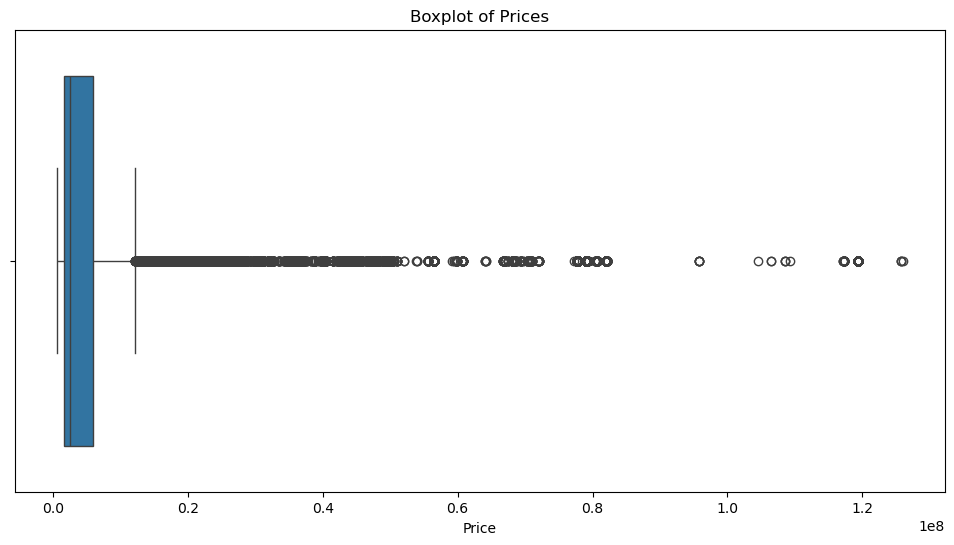

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

## 8. Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [27]:
# Lọc các cột phân loại trong DataFrame
categorical_df = df.select_dtypes(exclude=['int64', 'float64', 'datetime64'])

# Tạo dictionary chứa dữ liệu cho DataFrame
data = {
    "row_name": ["missing_ratio", "num_values", "value_ratios"]
}

# Lặp qua từng cột phân loại và tính toán các thông tin cần thiết
for col in categorical_df.columns:
    # Tính missing ratio
    missing_ratio = (categorical_df[col].isna().sum() / len(categorical_df[col])) * 100
    
    # Tính số lượng giá trị khác nhau
    num_values = categorical_df[col].nunique()
    
    # Tính tỉ lệ của các giá trị
    value_ratios = categorical_df[col].value_counts(normalize=True).round(3) * 100
    dict_value_ratios = value_ratios.to_dict()

    # Thêm thông tin của cột vào dictionary
    data[col] = [missing_ratio, num_values, dict_value_ratios]

# Tạo DataFrame từ dictionary và đặt row_name làm index
cat_col_info_df = pd.DataFrame(data).set_index('row_name')



In [28]:
cat_col_info_df

,scrape_date,id_departure,id_arrival,airline,travel_class,is_nonstop,departure_date,departure_time,arrival_date,arrival_time
row_name,,,,,,,,,,
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,21,1,3,44,2,36,90,208,91,211
value_ratios,"{'2024-11-18': 4.9, '2024-11-15': 4.9, '2024-1...",{'SGN ': 100.0},"{'HAN ': 58.8, 'DAD ': 31.3, 'CXR ': 9.9}","{'Vietnam Airlines': 61.3, 'Vietjet': 23.40000...","{'Economy': 63.4, 'Business': 36.6}","{'Nonstop': 92.0, '1 stop in CAN': 1.799999999...","{2025-02-09: 1.5, 2025-01-24: 1.40000000000000...","{08:00:00: 3.3000000000000003, 07:00:00: 3.0, ...","{2025-02-09: 1.5, 2025-01-26: 1.5, 2025-01-24:...","{13:05:00: 2.8000000000000003, 22:35:00: 2.7, ..."


## 9. Phân tích dữ liệu theo cột 

In [29]:
import matplotlib.pyplot as plt

### a) Cột Price

Kiểu dữ liệu của cột 'price': float64


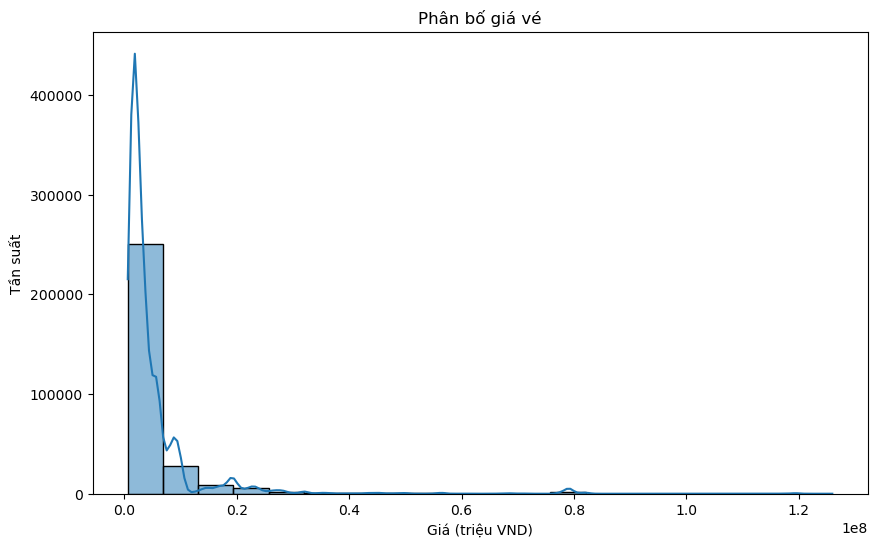


--- Thống kê mô tả cho cột 'price' ---
count    2.997900e+05
mean     5.239275e+06
std      9.244196e+06
min      6.136400e+05
25%      1.674200e+06
50%      2.523000e+06
75%      5.860000e+06
max      1.259760e+08
Name: price, dtype: float64


In [30]:
# Kiểm tra kiểu dữ liệu của cột price
print("Kiểu dữ liệu của cột 'price':", df['price'].dtype)

# Vẽ biểu đồ phân bố giá
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Phân bố giá vé')
plt.xlabel('Giá (triệu VND)')
plt.ylabel('Tần suất')
plt.show()

# Thống kê mô tả cho giá
print("\n--- Thống kê mô tả cho cột 'price' ---")
print(df['price'].describe())


In [31]:
min_max_prices = df.groupby('airline')['price'].agg(['min', 'max']).reset_index()
print(min_max_prices)

                                             airline          min          max
0                                             Asiana   18252000.0   18292000.0
1                           Asiana, Vietnam Airlines   40207000.0   50519000.0
2                                     Bamboo Airways     637000.0    8660750.0
3                Cambodia Angkor Air, China Southern   44365000.0   70753000.0
4              Cambodia Angkor Air, Vietnam Airlines   14337000.0   17421000.0
5                                     Cathay Pacific   19298320.0   38672000.0
6                     Cathay Pacific, China Southern   42216000.0   42333000.0
7                   Cathay Pacific, Vietnam Airlines    8861000.0   45423000.0
8                                     China Airlines   14013000.0   24708000.0
9                   China Airlines, Vietnam Airlines   18021000.0   18031000.0
10                     China Eastern, China Southern   71869000.0   72042000.0
11  China Eastern, Shanghai Airlines, China Southern

### b) Cột hãng hàng không

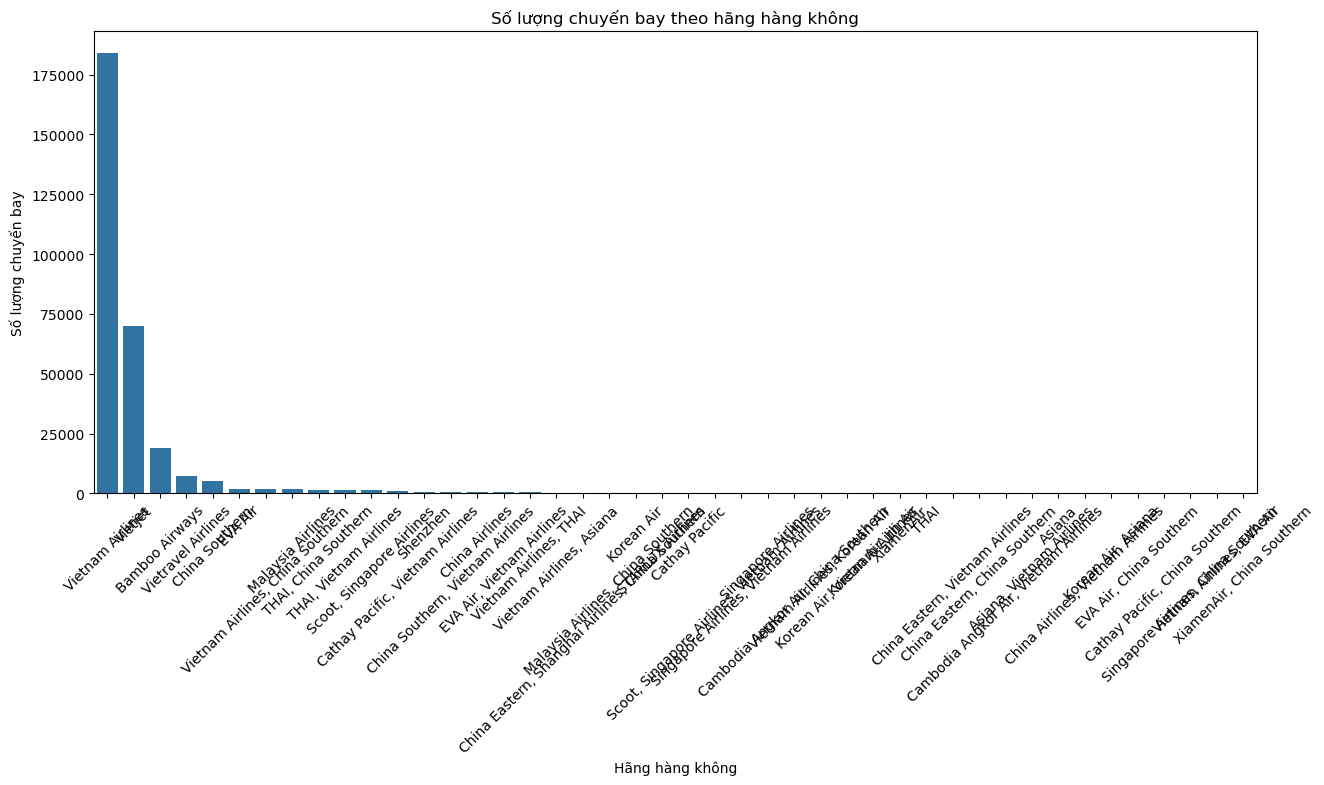

In [32]:
# Đếm số lượng chuyến bay theo hãng hàng không
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index)
plt.title('Số lượng chuyến bay theo hãng hàng không')
plt.xlabel('Hãng hàng không')
plt.ylabel('Số lượng chuyến bay')
plt.xticks(rotation=45)
plt.show()


### c) Cột loại vé

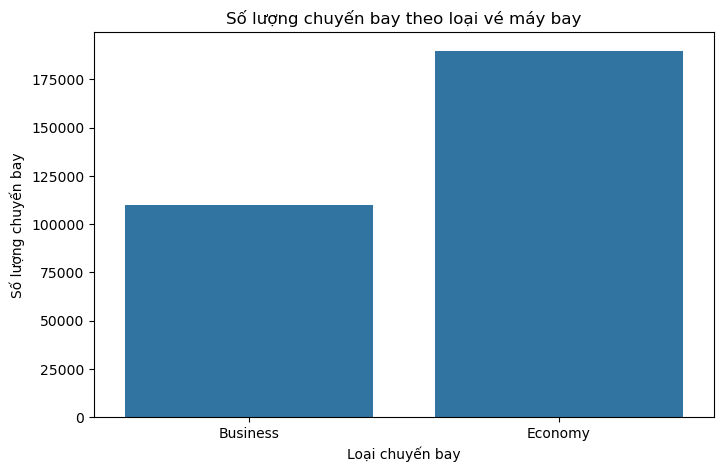

In [33]:
# Đếm số lượng chuyến bay theo loại chuyến bay
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='travel_class')
plt.title('Số lượng chuyến bay theo loại vé máy bay')
plt.xlabel('Loại chuyến bay')
plt.ylabel('Số lượng chuyến bay')
plt.show()

### d) Cột thời gian khởi hành 

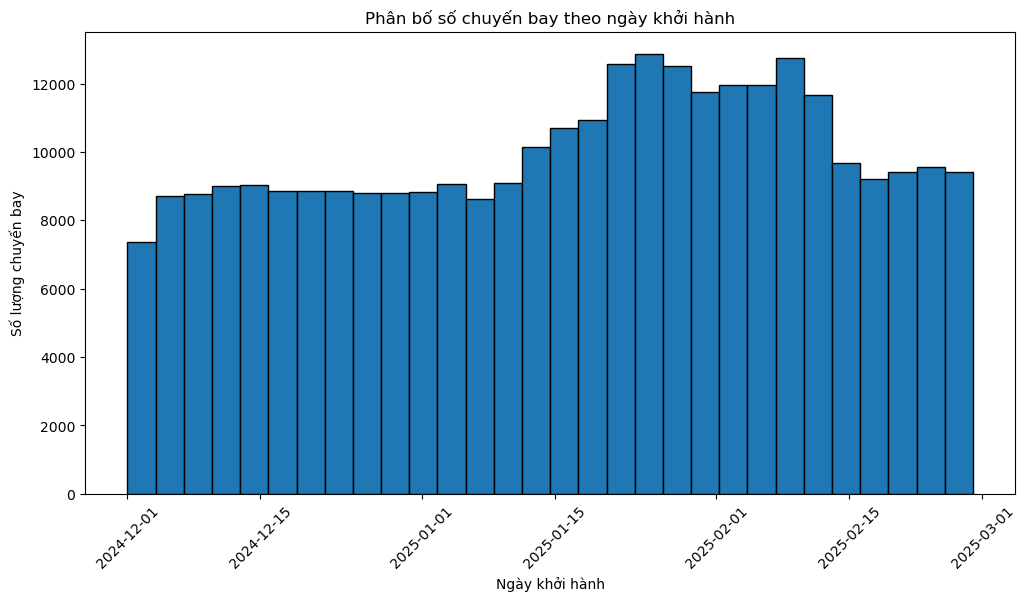

In [34]:
# Vẽ biểu đồ phân bố của cột departure_date
plt.figure(figsize=(12, 6))
plt.hist(df['departure_date'], bins=30, edgecolor='black')  # Sử dụng bins cho mỗi ngày
plt.title('Phân bố số chuyến bay theo ngày khởi hành')
plt.xlabel('Ngày khởi hành')
plt.ylabel('Số lượng chuyến bay')
plt.xticks(rotation=45)
plt.show()

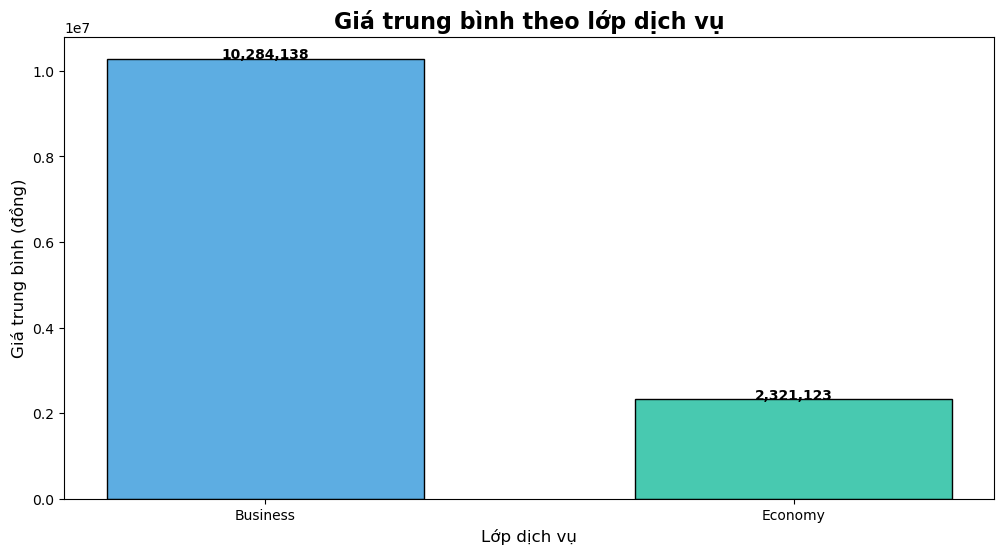

In [35]:
# Tính toán giá trung bình theo lớp dịch vụ
average_price_by_class = df.groupby('travel_class')['price'].mean().reset_index()

# Thiết lập màu sắc cho từng lớp dịch vụ
colors = ['#5DADE2', '#48C9B0', '#F4D03F', '#DC7633']

# Tạo biểu đồ cột cho giá trung bình theo lớp dịch vụ
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_class['travel_class'], average_price_by_class['price'], color=colors, edgecolor='black', width=0.6)

# Thêm tiêu đề và nhãn trục
plt.title('Giá trung bình theo lớp dịch vụ', fontsize=16, fontweight='bold')
plt.xlabel('Lớp dịch vụ', fontsize=12)
plt.ylabel('Giá trung bình (đồng)', fontsize=12)

# Thêm giá trị trên từng cột
for index, value in enumerate(average_price_by_class['price']):
    plt.text(index, value + 10, f'{value:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Hiển thị biểu đồ
plt.show()


## Phân tích mối quan hệ giữa các biến

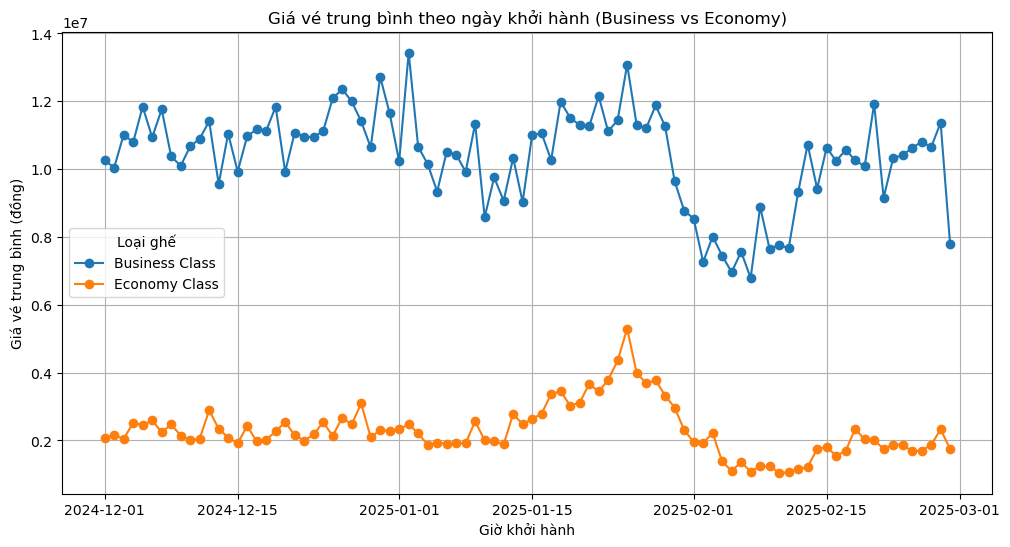

In [36]:
# Tính giá vé trung bình theo giờ khởi hành cho từng loại ghế ngồi
avg_price_by_date_class = df.groupby(['departure_date', 'travel_class'])['price'].mean().unstack()

# Vẽ biểu đồ giá vé trung bình theo ngày khởi hành, chia theo loại ghế ngồi
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_date_class.index, avg_price_by_date_class['Business'], marker='o', label='Business Class')
plt.plot(avg_price_by_date_class.index, avg_price_by_date_class['Economy'], marker='o', label='Economy Class')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Giá vé trung bình theo ngày khởi hành (Business vs Economy)')
plt.xlabel('Giờ khởi hành')
plt.ylabel('Giá vé trung bình (đồng)')
plt.legend(title='Loại ghế')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


Biểu đồ cho thấy sự chênh lệch giá rõ rệt giữa hai hạng ghế: Business có giá trung bình khoảng 9 triệu đồng, cao hơn nhiều so với Economy ở mức khoảng 2 triệu đồng. Cả hai hạng ghế đều có giá ổn định trong khoảng thời gian từ 3/11 đến 15/11, với biến động nhẹ nhưng không đáng kể, cho thấy thời điểm khởi hành không ảnh hưởng nhiều đến giá vé trong giai đoạn này.






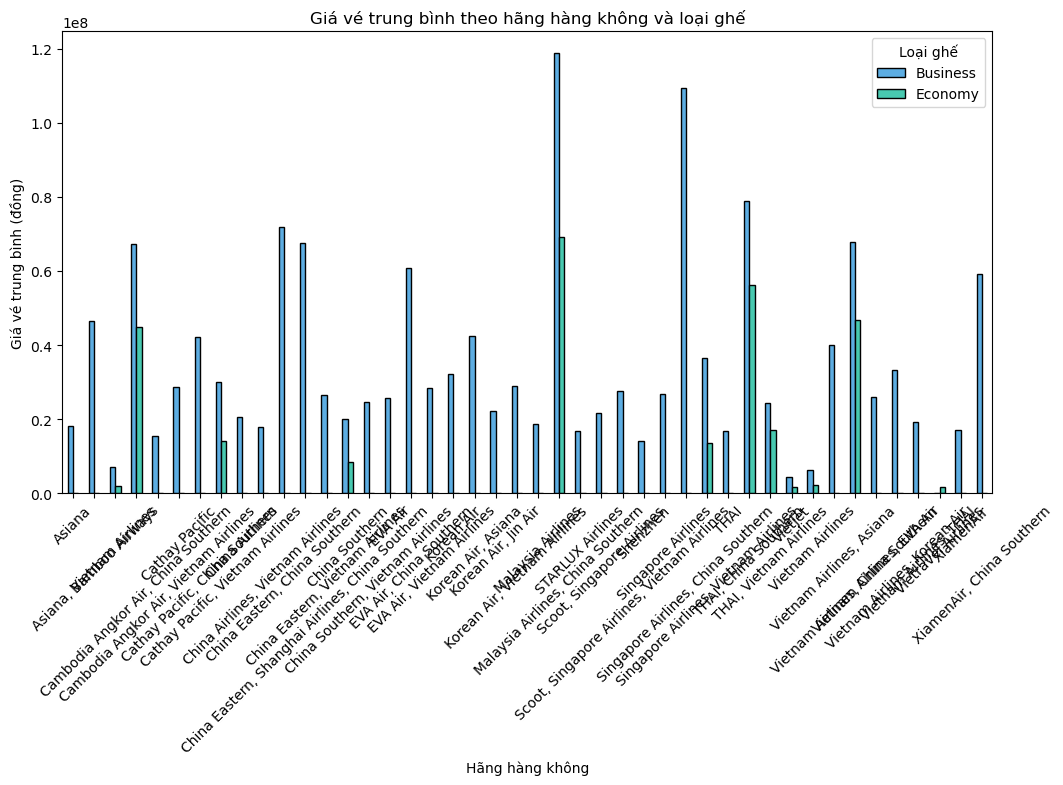

In [37]:
# Tính giá vé trung bình theo hãng hàng không và loại ghế ngồi
avg_price_by_airline_class = df.groupby(['airline', 'travel_class'])['price'].mean().unstack()

# Vẽ biểu đồ cột cho giá vé trung bình theo hãng hàng không, phân theo loại ghế ngồi
plt.figure(figsize=(12, 6))
avg_price_by_airline_class.plot(kind='bar', stacked=False, color=['#5DADE2', '#48C9B0'], edgecolor='black', ax=plt.gca())

# Thêm tiêu đề và nhãn trục
plt.title('Giá vé trung bình theo hãng hàng không và loại ghế')
plt.xlabel('Hãng hàng không')
plt.ylabel('Giá vé trung bình (đồng)')
plt.xticks(rotation=45)
plt.legend(title='Loại ghế')

# Hiển thị biểu đồ
plt.show()


Sự khác biệt lớn giữa Business và Economy:

* Ở tất cả các hãng hàng không, giá vé hạng Business cao hơn rất nhiều so với hạng Economy, cho thấy sự phân tầng rõ rệt về dịch vụ giữa hai hạng ghế.

* Các hãng hàng không như Cathay Pacific, China Airlines, China Southern, Shenzhen, và XiamenAir có giá vé Business cao nhất, dao động từ 15 triệu đến 20 triệu đồng. Điều này có thể do các dịch vụ quốc tế của các hãng này thường nhắm đến đối tượng khách hàng doanh nhân hoặc khách hàng cao cấp.

* Các hãng hàng không nội địa như Bamboo Airways, Vietjet, Vietnam Airlines, và Vietravel Airlines có giá vé trung bình cho cả Business và Economy thấp hơn so với các hãng quốc tế. Trong đó, Vietjet và Vietravel Airlines có giá Economy khá thấp, phù hợp với phân khúc khách hàng bình dân.

* Các hãng quốc tế tập trung vào dịch vụ hạng Business với giá cao, trong khi các hãng nội địa cung cấp cả hai hạng với giá thấp hơn, đặc biệt là ở hạng Economy. Vietnam Airlines là hãng nội địa duy nhất có cả hai hạng Business và Economy với mức giá trung bình cao hơn so với các hãng nội địa khác, cho thấy đây là hãng hàng không hướng tới phân khúc khách hàng đa dạng hơn.

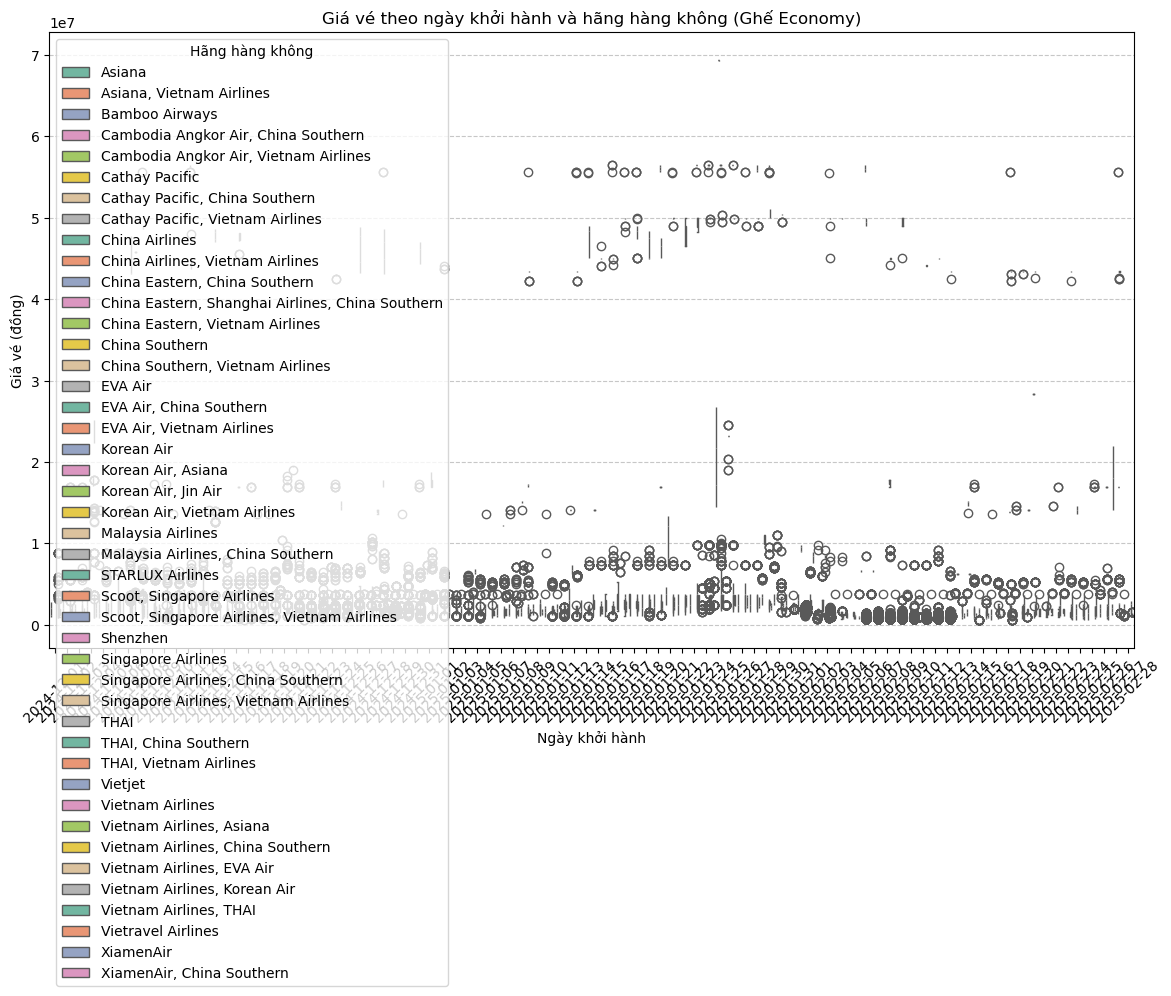

c:\Users\LENOVO\miniconda3\envs\min_ds-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


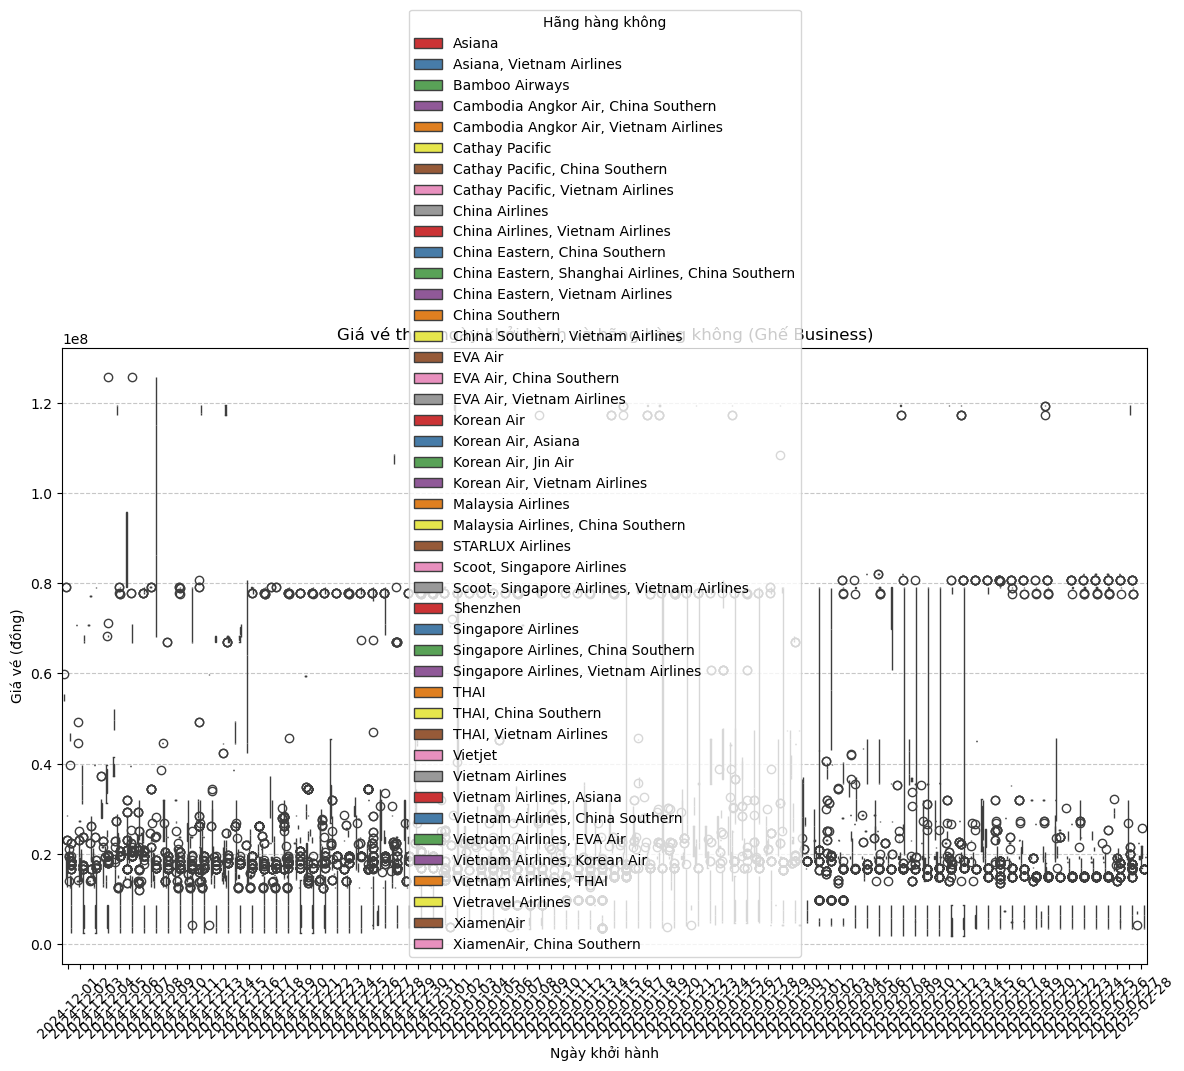

In [38]:
# Biểu đồ cho ghế Economy
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['travel_class'] == 'Economy'], x='departure_date', y='price', hue='airline', palette='Set2')
plt.title('Giá vé theo ngày khởi hành và hãng hàng không (Ghế Economy)')
plt.xlabel('Ngày khởi hành')
plt.ylabel('Giá vé (đồng)')
plt.xticks(rotation=45)
plt.legend(title='Hãng hàng không')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Biểu đồ cho ghế Business
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['travel_class'] == 'Business'], x='departure_date', y='price', hue='airline', palette='Set1')
plt.title('Giá vé theo ngày khởi hành và hãng hàng không (Ghế Business)')
plt.xlabel('Ngày khởi hành')
plt.ylabel('Giá vé (đồng)')
plt.xticks(rotation=45)
plt.legend(title='Hãng hàng không')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


